<img src="logo.png"/>

# Using Python to describe optical systems
   This example will show you the basics of using Fourier transforms to model optical imaging systems. 
   
The first step is to import the modules we will need to perform the calculations. All of thse are included in the base Anaconda installation.
    

In [95]:
import numpy as np 
from matplotlib import pyplot as plt
from numpy.fft import fft2,ifft2,fftshift,ifftshift
import skimage
from skimage import io
from scipy.signal import convolve2d
import scipy.special
import scipy.optimize
import glob

Next we must define the basic parameters of the imaging system. 

In [96]:
w = 512
h = 512
NA = 1.2
p_size = 30
wavelength = 600

In [1]:
# We first need to setup some key components for the calculations 
x = np.linspace(-w/2,w/2,w)
y = np.linspace(-w/2,w/2,h)
# This provides us with two helpful matrices we can use as a grid of x,y co-ordinates
X,Y = np.meshgrid(x,y)

# We can then calculate an array representing the distance from the central element
R = np.sqrt(X**2+Y**2)
# plt.imshow(R)
# plt.show

NameError: name 'np' is not defined

Now we have the basics we can begin to start describing optical systems. We can begin by considering the simplest optical system, a circular lens.

<function matplotlib.pyplot.show(*args, **kw)>

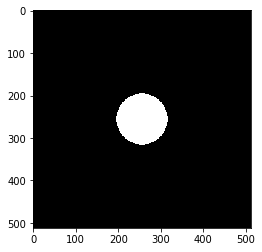

In [99]:
# We now use the cutoff frequency to calulate the pupil function
R[R<60]=1
R[R>1]=0
plt.imshow(R, cmap='gray')
plt.show

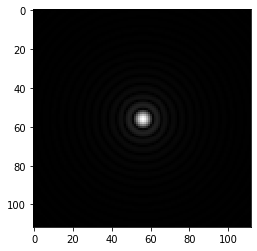

In [100]:
# From the pupil function we can calculate the coherent Point Spread Function
FT = np.fft.fft2(R)
PSFc = np.fft.fftshift(np.abs(FT))
plt.imshow(PSFc[200:312,200:312], cmap='gray')
plt.show()

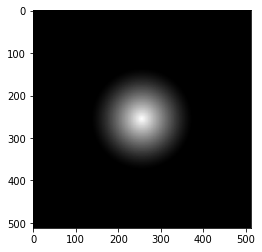

In [101]:
# For fluoresence microscopy we need the incoherent PSF, calculated as the square of the coherent PSF
PSFi = FT**2
# We can then describe the incoherent OTF from the incoherent PSF
OTF = np.fft.ifft2(PSFi)
OTF = np.fft.fftshift(OTF)
plt.imshow(np.abs(OTF), cmap='gray')
plt.show()
# We can see this is equivalent to computing the convoltuion of the pupil function with itself

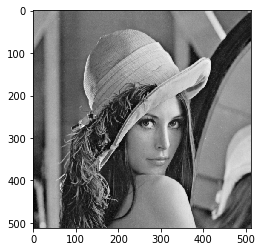

In [102]:
Io = skimage.io.imread('lena.png')
Io= Io.astype('float')
plt.imshow(Io, cmap='gray')
plt.show()

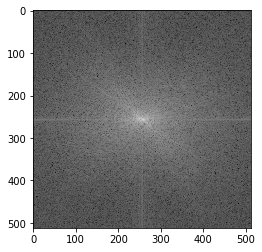

In [103]:
FT = np.fft.fft2(Io)
FT = np.fft.fftshift(FT)
intensity = np.log(np.abs(FT)+1)
plt.imshow(intensity, cmap='gray')
plt.show()

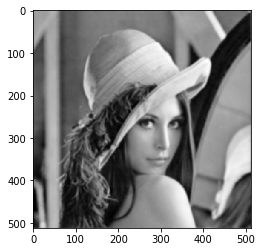

In [104]:
FT = FT*OTF
recovered = np.fft.ifft2(FT)
recovered = np.abs(recovered)
plt.imshow(recovered, cmap='gray')
plt.show()